## Estudiante: Jose Daniel Alvear Acevedo

Base de datos de vinos

# Programación estadística con PYTHON

Carga de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos con PANDAS

In [ ]:
df_vinos = pd.read_csv('/content/WineQuality_Red.csv')
df_vinos.head(4)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [ ]:
#Guardemos una copia para mas adelante
df_original = df_vinos.copy

##Analisis exploratorio

In [ ]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df_vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Ya tenemos los estadisticos descriptivos de cada variable (promedio, desviación estándar, mediana y percentil 75%), ahora vamos a calcular la Moda para todas las variables.

In [ ]:
Moda = df_vinos.mode() #Se calcula la moda para todas las variables
Moda

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


In [ ]:
#Adicionalmente quiero calcular la varianza del DataFrame con el que vamos a trabajar 
varianza_vinos = df_vinos.var(),2
varianza_vinos
#Se realiza el calculo para todas nuestras variables de la BD

(fixed acidity              3.031416
 volatile acidity           0.032062
 citric acid                0.037947
 residual sugar             1.987897
 chlorides                  0.002215
 free sulfur dioxide      109.414884
 total sulfur dioxide    1082.102373
 density                    0.000004
 pH                         0.023835
 sulphates                  0.028733
 alcohol                    1.135647
 quality                    0.652168
 dtype: float64, 2)

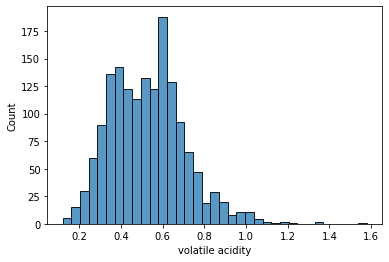

In [ ]:
#Distribución de la variable volatile acidity
sns.histplot(df_vinos['volatile acidity'])

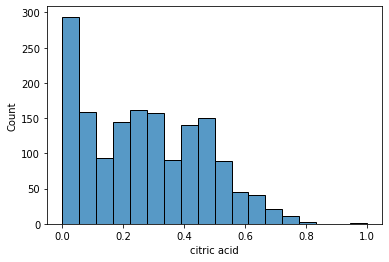

In [ ]:
sns.histplot(df_vinos['citric acid'])

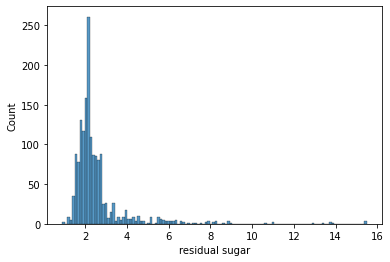

In [ ]:
sns.histplot(df_vinos['residual sugar'])

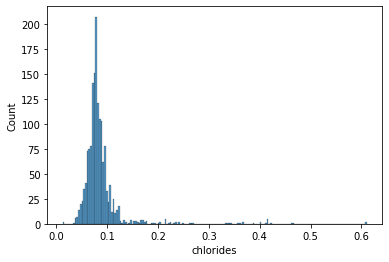

In [ ]:
sns.histplot(df_vinos['chlorides'])

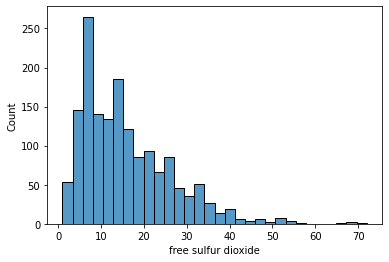

In [ ]:
sns.histplot(df_vinos['free sulfur dioxide'])

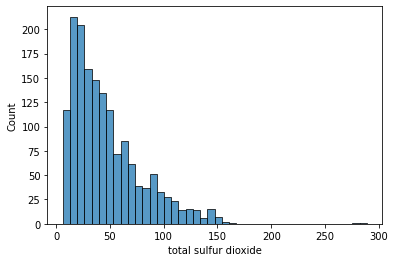

In [ ]:
sns.histplot(df_vinos['total sulfur dioxide'])

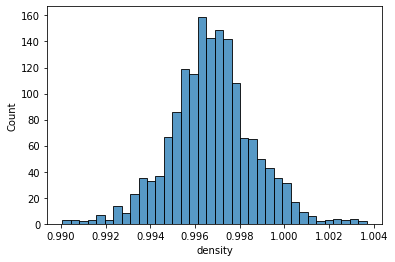

In [ ]:
sns.histplot(df_vinos['density'])

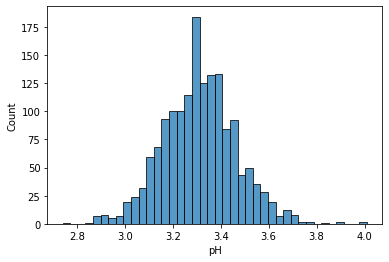

In [ ]:
sns.histplot(df_vinos['pH'])

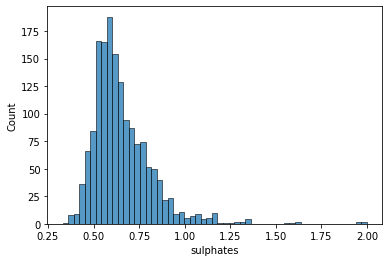

In [ ]:
sns.histplot(df_vinos['sulphates'])

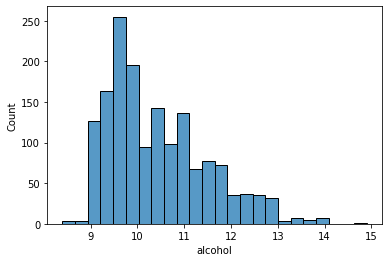

In [ ]:
sns.histplot(df_vinos['alcohol'])

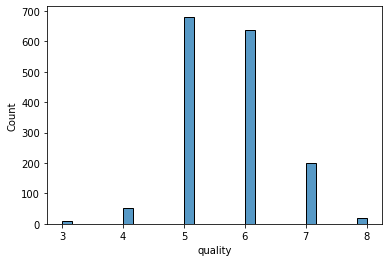

In [ ]:
sns.histplot(df_vinos['quality'])

## Analisis de correlaciones entre variables


Valor numerico del grado de asociación

In [ ]:
#Correlación es diferente de causalidad
df_vinos.corr()['quality'].sort_values() #Metodo de pearson

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

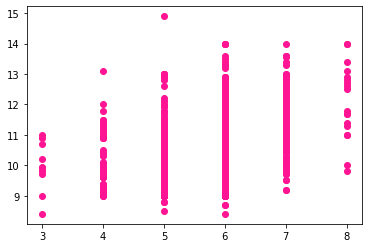

In [ ]:
#Correlación entre quality y Eval_stand (Alcohol)
plt.scatter(x = df_vinos['quality'], y = df_vinos['alcohol'], color='deeppink')


##Prueba de hipótesis y probabilidades 

La variable PH tiene la forma de una distribución normal

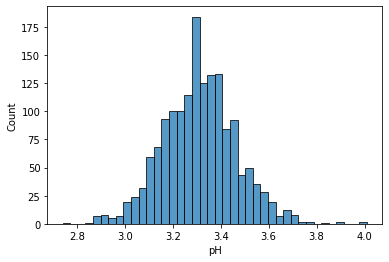

In [ ]:
#Se vuelve a graficar la variable PH
sns.histplot(df_vinos['pH'])

Realizamos un Test de normalidad para la variable PH
- Vamos a utilizar un nivel de significancia alfa del 0.05 y a suponer que las observaciones de cada muestra son independientes e idénticamente distribuidas

In [ ]:
#Utilizamos el Test de shapiro
#El p_value es la probabilidad de obtener los valores observados cuando H0 es verdadera
#El nivel de significancia es el limite para rechazar H0 para el ejercicio vamos a utilizar el 5%
#Si el Pvalue es menor que el Alfa (Nivel de significancia) entonces se rechaza H0 y se acepta la alternativa
#En caso contrario se acepta la hipotesis nula.

#Importamos la libreria a utilizar
from scipy.stats import shapiro

In [ ]:
data = df_vinos['pH']
stat, p = shapiro(data)
print('stat=%.3f, p=%.6f' %(stat, p))


stat=0.993, p=0.000002


In [ ]:
#Condición para reusmir e interpretar el resultado
if p> 0.05:
  print("Distribución Normal")

else:
  print('Distribución No Normal')


Distribución No Normal


Como el PValue es de distribución no normal, se rechaza la hipotesis nula. Por tal motivo se rechaza la hipotesis que los datos provienen de una distribución normal. 



Es necesario verificar el valor de la media y la mediana para poder descartar que no es una distribución normal 

In [ ]:
Vinos_mediana = df_vinos['pH'].median()
Vinos_media = df_vinos['pH'].mean()

In [ ]:
print(Vinos_media)

3.3111131957473416


In [ ]:
print(Vinos_mediana)

3.31


Los valores son bastante identicos y por tal motivo se determina que es una distribución normal. lo que paso en el Test, puede ser de que son muy pocos datos y no es concluyente el rechazo para este Test. Nota: Podemos verificar nuevamente la grafica anterior de la variabe PH

### Graficamos la variable alcohol  

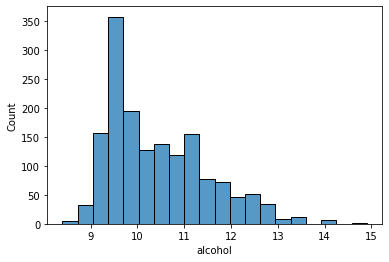

In [ ]:
sns.histplot(df_vinos['alcohol'], bins=20)

(array([  5.,  32., 157., 358., 195., 128., 138., 119., 155.,  77.,  73.,
         46.,  52.,  35.,   9.,  12.,   0.,   7.,   0.,   1.]),
 array([ 8.4  ,  8.725,  9.05 ,  9.375,  9.7  , 10.025, 10.35 , 10.675,
        11.   , 11.325, 11.65 , 11.975, 12.3  , 12.625, 12.95 , 13.275,
        13.6  , 13.925, 14.25 , 14.575, 14.9  ]),
 <a list of 20 Patch objects>)

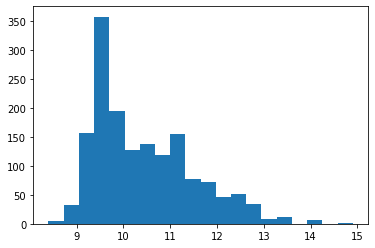

In [ ]:
plt.hist(df_vinos['alcohol'], bins=20)

Vamos a estandarizar nuestros datos de la variable alcohol (media de 0 y una desviación estandar de 1)

In [ ]:
#Probabilidad de obtener un valor Z
#Encontramos la media y la desviación estandar
eval_avg = round(df_vinos['alcohol'].mean(),2)
eval_sd = round(df_vinos['alcohol'].std(),2)
print(eval_avg, eval_sd)

10.42 1.07


In [ ]:
#Estandarizamos:
df_vinos['Eval_Stand'] = (df_vinos['alcohol']- eval_avg)/ eval_sd

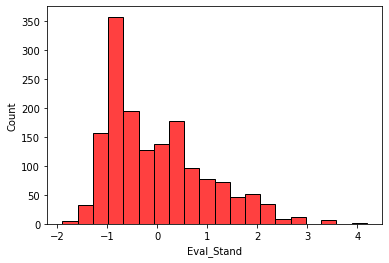

In [ ]:
#Distribución de las evaluaciones estandarizadas
sns.histplot(df_vinos['Eval_Stand'], bins=20, color='red')

In [ ]:
df10 = df_vinos.loc[df_vinos['alcohol']==10]
df10

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Eval_Stand
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,-0.392523
58,7.8,0.590,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5,-0.392523
116,8.3,0.540,0.28,1.9,0.077,11.0,40.0,0.99780,3.39,0.61,10.0,6,-0.392523
146,5.8,0.680,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,5,-0.392523
162,7.8,0.530,0.04,1.7,0.076,17.0,31.0,0.99640,3.33,0.56,10.0,6,-0.392523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4,-0.392523
1466,7.3,0.480,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7,-0.392523
1468,7.3,0.480,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,7,-0.392523
1494,6.4,0.310,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0,7,-0.392523


In [ ]:
df_vinos['alcohol'].max()

14.9

Ahora debemos obtener la probabilidad de obtener un nivel de alcohol menor a 10 en la 
base de datos de la Calidad del Vino Tinto. 

se utiliza el valor Z estandarizado

In [ ]:
import scipy
Probabilidad_alcohol = scipy.stats.norm.cdf((-0.57 - eval_avg) / eval_sd) #Area bajo la curva para obtener un score < 10
print(1-round(Probabilidad_alcohol,10)) 

1.0


Qué puedes sugerir de los niveles de alcohol tomando como 
referencia la probabilidad anterior

El nivel de alcohol mas alto es 10, por tal motivo es bastante probable tener vinos con menos nivel de alcohol.

# Regresión Lineal Simple

Finalmente has llegado a la parte 3 y última de tu proyecto final en 
el que construirás un modelo de regresión simple para predecir la 
calidad (quality) del vino tomando como variable explicativa aquella 
que en tu análisis exploratorio haya tenido una correlación mayor con 
con la variable dependiente

--> Segun el analisis de correlación la calidad del vino tiene una alta correlación con el alcohol del mismo 

--> Vamos a utilizar la variable de alcohol pero sin estandarizarla para no perder información.

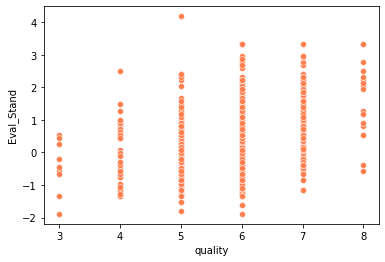

In [ ]:
sns.scatterplot(x = df_vinos['quality'], y = df_vinos['Eval_Stand'], color='coral')

(0.0, 8.25)

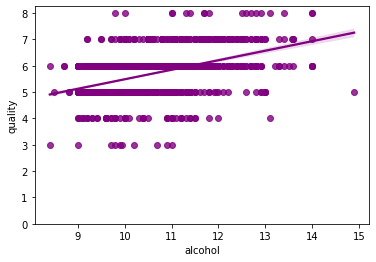

In [ ]:
#Graficar datos y ajustar el modelo de regresión lineal 
sns.regplot(x= 'alcohol', y='quality', data=df_vinos, color='purple')
plt.ylim(0,)

In [ ]:
from pandas.core.common import random_state
alcohol = df_vinos['alcohol']
quality = df_vinos['quality']

x = np.array(alcohol).reshape(-1,1) #Pasamos a columnas (Guardarlo como columnas)
y = np.array(quality) #Verlo con renglones

#partición de los datos
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20, random_state=0) #Random para la semilla

In [ ]:
#Ajustamos el modelo 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
#Predecimos precios
pred = lr.predict(xtest)

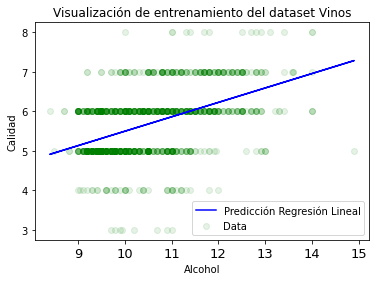

In [ ]:
#Visualizo resultados
plt.scatter(xtrain, ytrain, color='green', label='Data', alpha=.1)
plt.plot(xtrain, lr.predict(xtrain), color= 'blue', label='Predicción Regresión Lineal')
plt.title("Visualización de entrenamiento del dataset Vinos")
plt.xlabel('Alcohol')
plt.ylabel('Calidad')

plt.xticks(fontsize=13)
plt.xticks(fontsize=13)

plt.legend()
plt.show()

¿Que tanto difieren?

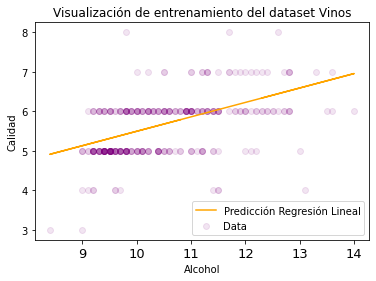

In [ ]:
plt.scatter(xtest, ytest, color='purple', label='Data', alpha=.1)
plt.plot(xtest, lr.predict(xtest), color= 'orange', label='Predicción Regresión Lineal')
plt.title("Visualización de entrenamiento del dataset Vinos")
plt.xlabel('Alcohol')
plt.ylabel('Calidad')

plt.xticks(fontsize=13)
plt.xticks(fontsize=13)

plt.legend()
plt.show()

Si siguen la misma tendencia, pero tenemos muy pocos valores en los ultimos rangos

## Ecuación de regresión lineal

In [ ]:
print('-------------------------------------Resultados------------------------------------')
print('Promedio de la calidad en el dataset de entrenamiento: {:2f}'.format(ytrain.mean()))
print('---------------------------------------------------------------------------------')
print('Promedio de la calidad en el dataset de evaluación: {:2f}'.format(ytest.mean()))

print('\n')
print('Intercepto Bo: {:0.3f}'.format(lr.intercept_))
print('coefficiente B1: {}'.format(lr.coef_))

-------------------------------------Resultados------------------------------------
Promedio de la calidad en el dataset de entrenamiento: 5.646599
---------------------------------------------------------------------------------
Promedio de la calidad en el dataset de evaluación: 5.593750


Intercepto Bo: 1.846
coefficiente B1: [0.36494637]


- Las dos muestras de promedios de la calidad son parecidas entre si
- El intercepto B0
- Coeficiente B1

¿Es un buen modelo? 

In [51]:
# Importamos librerías
from sklearn import metrics   

Root Mean Squared error(RMSE)

In [52]:
pred = lr.predict(xtest)
rmse = float(format(np.sqrt(metrics.mean_squared_error(ytest,pred)),'.3f'))

print('-------------Resultado RMSE---------------------')
print('Root Mean Squared error (RMSE): {}'.format(rmse))

-------------Resultado RMSE---------------------
Root Mean Squared error (RMSE): 0.661


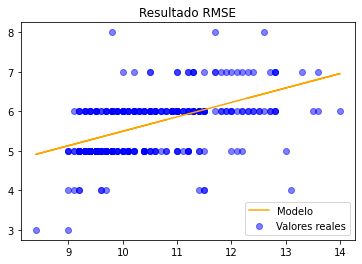

In [56]:
#Gráfico
plt.clf()
plt.plot(xtest, pred, color='orange' ,label='Modelo')
plt.scatter(xtest, ytest, c='blue', alpha = 0.5, label='Valores reales')
plt.title('Resultado RMSE')
plt.legend()

R-Squared

In [57]:
rtrsm = float(format(lr.score(xtrain, ytrain),'.3f'))
rtesm = float(format(lr.score(xtest, ytest),'.3f'))

print('--------------Resultado de la R cuadrada------------')
print('R-Squared (training): {}'.format(rtrsm))
print('R-Squared (test): {}'.format(rtesm))

--------------Resultado de la R cuadrada------------
R-Squared (training): 0.223
R-Squared (test): 0.238


# Conclusiones:

- El resultado de nuestro modelo no es muy optimo pero se puede tomar como Baseline para aplicar otros mas elaborados; o tambien se puede pensar en incluir mas variables para la predicción de la calidad del vino.
